In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [3]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
with con:
    con.executemany(sql, data)

In [5]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [18]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [19]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [20]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-24


In [21]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


In [22]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [23]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [24]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [25]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-12 08:04:39,22.876399483393037
2021-07-13 08:04:39,22.936647676852964
2021-07-14 08:04:39,23.390282237270334
2021-07-15 08:04:39,20.30917115066148
2021-07-16 08:04:39,20.798450655671555


In [26]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-12 08:04:39.478919,22.876399483393037
2021-07-13 08:04:39.478919,22.936647676852964
2021-07-14 08:04:39.478919,23.390282237270334
2021-07-15 08:04:39.478919,20.30917115066148
2021-07-16 08:04:39.478919,20.798450655671555
2021-07-17 08:04:39.478919,24.700034552806073
2021-07-18 08:04:39.478919,21.164949485819275
2021-07-19 08:04:39.478919,23.905349927774115
2021-07-20 08:04:39.478919,19.170411114471435
2021-07-21 08:04:39.478919,24.57705169564562


In [27]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-12 08:04:39.478919,22.876399483393037
2021-07-13 08:04:39.478919,22.936647676852964
2021-07-14 08:04:39.478919,23.390282237270334
2021-07-15 08:04:39.478919,20.30917115066148
2021-07-16 08:04:39.478919,20.798450655671555
2021-07-17 08:04:39.478919,24.700034552806073
2021-07-18 08:04:39.478919,21.164949485819275
2021-07-19 08:04:39.478919,23.905349927774115
2021-07-20 08:04:39.478919,19.170411114471435
2021-07-21 08:04:39.478919,24.57705169564562


In [28]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.037395101505737,25.991204271627545,18.273175271147043
2022,22.241724354784008,25.959658307881043,18.05223472669462


In [29]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-12 08:04:39', '2021-07-13 08:04:39',
               '2021-07-14 08:04:39', '2021-07-15 08:04:39',
               '2021-07-16 08:04:39', '2021-07-17 08:04:39',
               '2021-07-18 08:04:39', '2021-07-19 08:04:39',
               '2021-07-20 08:04:39', '2021-07-21 08:04:39',
               ...
               '2022-11-14 08:04:39', '2022-11-15 08:04:39',
               '2022-11-16 08:04:39', '2022-11-17 08:04:39',
               '2022-11-18 08:04:39', '2022-11-19 08:04:39',
               '2022-11-20 08:04:39', '2022-11-21 08:04:39',
               '2022-11-22 08:04:39', '2022-11-23 08:04:39'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

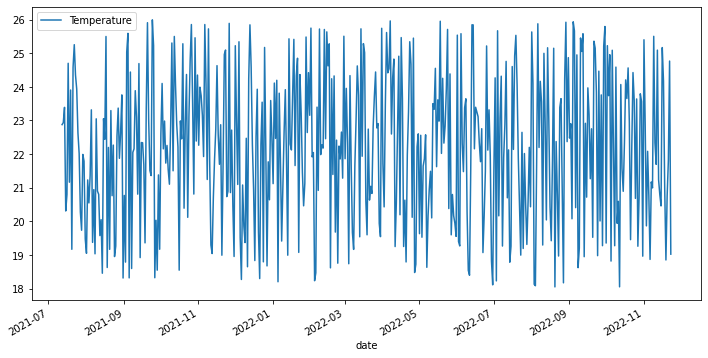

In [30]:
df.plot(figsize=(12, 6))